Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from wordcloud import WordCloud

# Download stopwords if using NLTK
nltk.download('stopwords')
from nltk.corpus import stopwords

Matplotlib is building the font cache; this may take a moment.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.



# Step 1: Load Dataset

In [3]:
df = pd.read_csv("../data/raw_analyst_ratings.csv")  
df.head()

#  Step 2: Basic EDA
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None

Missing Values:
Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64


# Step 3: Descriptive Statistics

In [4]:
# Headline length
df['headline_length'] = df['headline'].apply(len)
print("\nHeadline Length Stats:")
print(df['headline_length'].describe())

# Articles per publisher
publisher_counts = df['publisher'].value_counts()
print("\nTop Publishers:")
print(publisher_counts.head(10))


Headline Length Stats:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64

Top Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


# Step 4: Convert date column to datetime

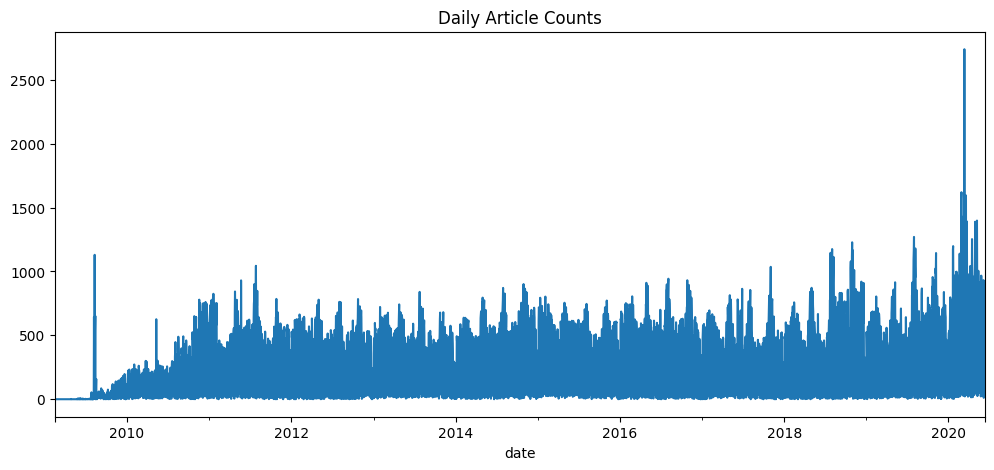

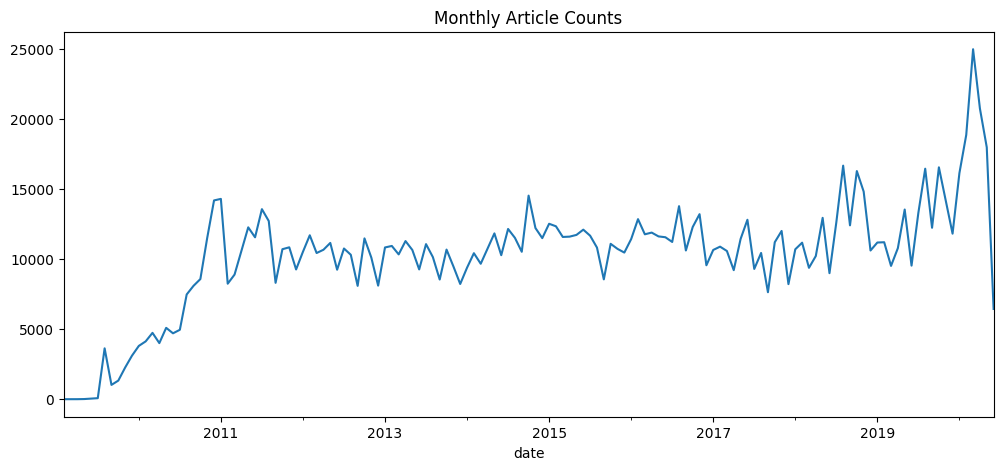

In [6]:
df['date'] = pd.to_datetime(df['date'], format='mixed', utc=True)
df = df.sort_values('date')
df.set_index('date', inplace=True)

# Daily & Monthly article counts
daily_counts = df.resample('D').size()
monthly_counts = df.resample('M').size()

plt.figure(figsize=(12,5))
daily_counts.plot(title="Daily Article Counts")
plt.show()

plt.figure(figsize=(12,5))
monthly_counts.plot(title="Monthly Article Counts")
plt.show()


# Step 5: Text Analysis - Most Frequent Words


Top 20 Words in Headlines:
vs 162099
stocks 161776
est 140604
eps 128897
market 120558
shares 114313
reports 108710
update 91723
earnings 87399
sales 79645
top 79632
benzinga 74516
pt 73068
week 69572
announces 66591
price 64407
buy 64371
mid 62263
downgrades 61959
trading 61182


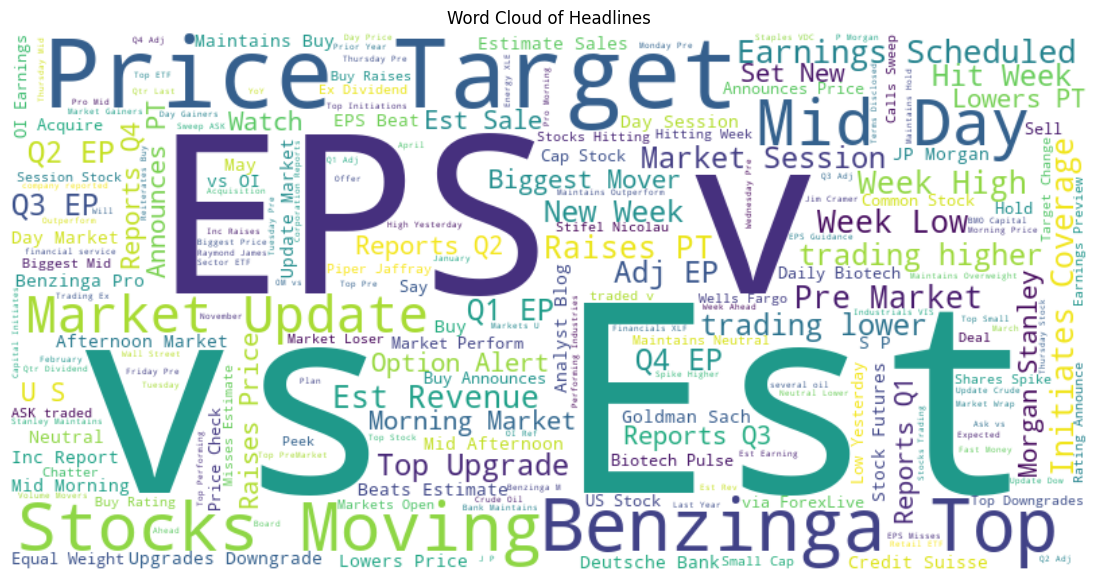

In [8]:
stop_words = stopwords.words('english')
vectorizer = CountVectorizer(stop_words=stop_words)
X = vectorizer.fit_transform(df['headline'].astype(str))
word_counts = X.sum(axis=0)
words_freq = [(word, word_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

print("\nTop 20 Words in Headlines:")
for word, count in words_freq[:20]:
    print(word, count)

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['headline'].astype(str)))
plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Headlines")
plt.show()

# Step 6: Time Analysis - Hour of Day


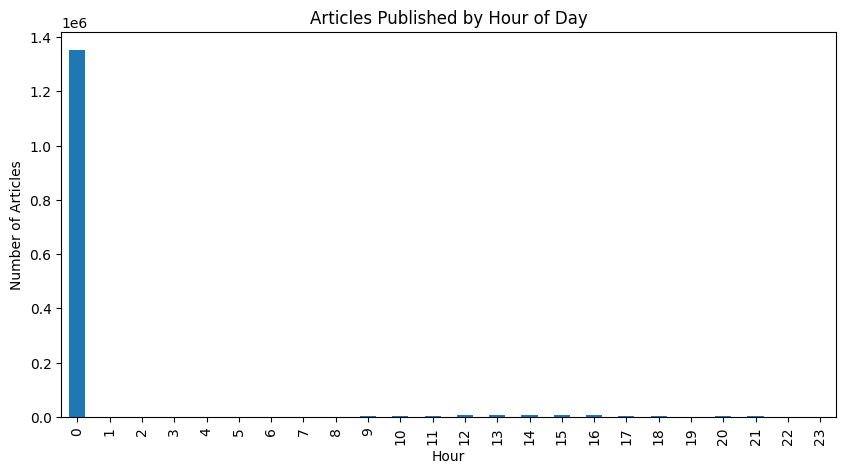

In [11]:
df['hour'] = df.index.hour
hourly_counts = df['hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
hourly_counts.plot(kind='bar')
plt.title("Articles Published by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Number of Articles")
plt.show()

# Step 7: Publisher Analysis


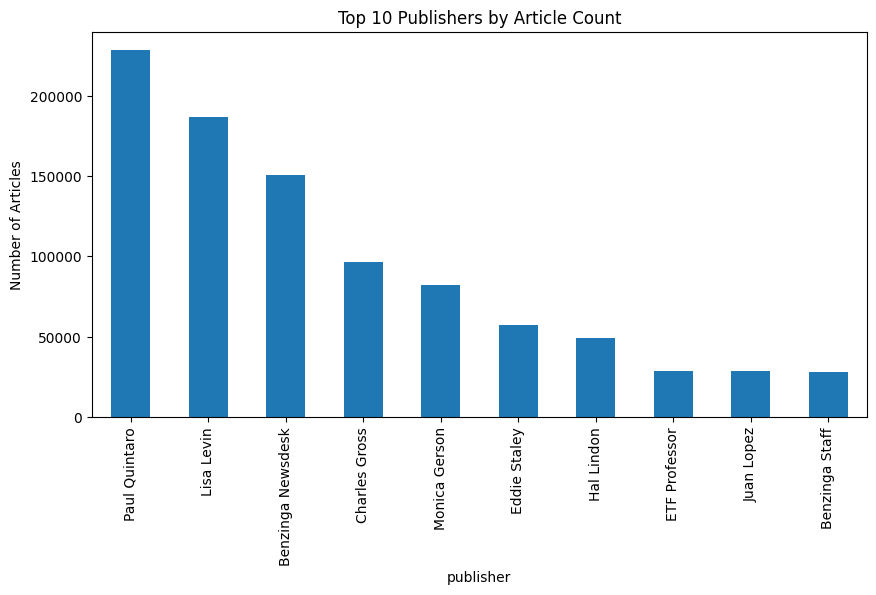

In [12]:
top_publishers = publisher_counts.head(10)
plt.figure(figsize=(10,5))
top_publishers.plot(kind='bar')
plt.title("Top 10 Publishers by Article Count")
plt.ylabel("Number of Articles")
plt.show()

# Extract Domains from Publisher Emails (if any)


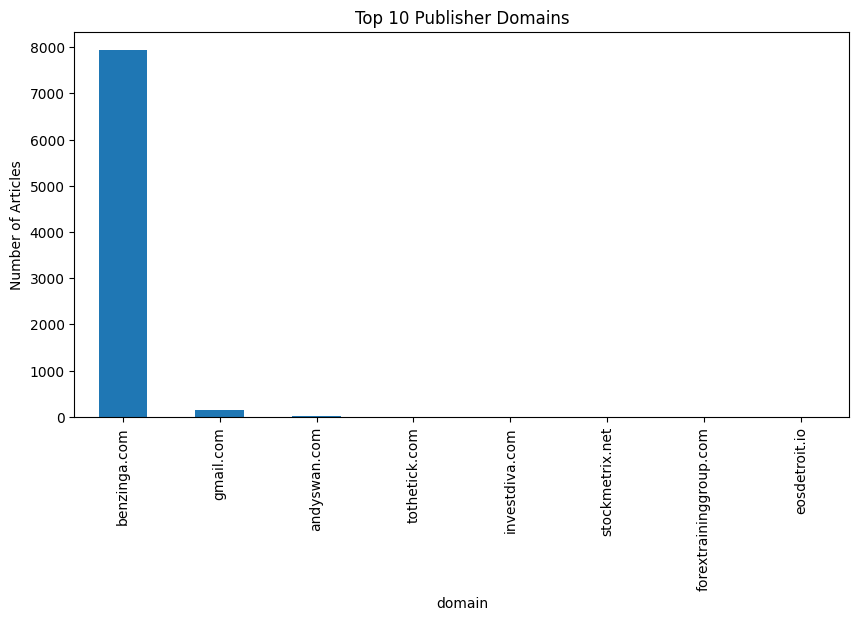

In [13]:
if df['publisher'].str.contains('@').any():
    df['domain'] = df['publisher'].str.extract(r'@([\w\.]+)')
    top_domains = df['domain'].value_counts().head(10)
    plt.figure(figsize=(10,5))
    top_domains.plot(kind='bar')
    plt.title("Top 10 Publisher Domains")
    plt.ylabel("Number of Articles")
    plt.show()